# Visualizacion de datos

In [1]:

import pandas as pd
import numpy as np
import sys
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set(font_scale = 1.5)
sns.set_context("poster")
sns.set(rc={"figure.figsize": (24.,12.)})
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')

### Cargamos los datos limpios

In [3]:
df = pd.read_csv("datos_limpios.csv")

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,1.076923
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0,0.400000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0,0.294737
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0,0.358333
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0,0.402174


In [5]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,1.243557,0.010309,0.444047
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441,6.856419,0.101140,0.311357
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061905
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274419
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518056
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.637500


### Visulizamos los pairplots para encontrar alguna correlacion entre las variables según el tipo de gasolina

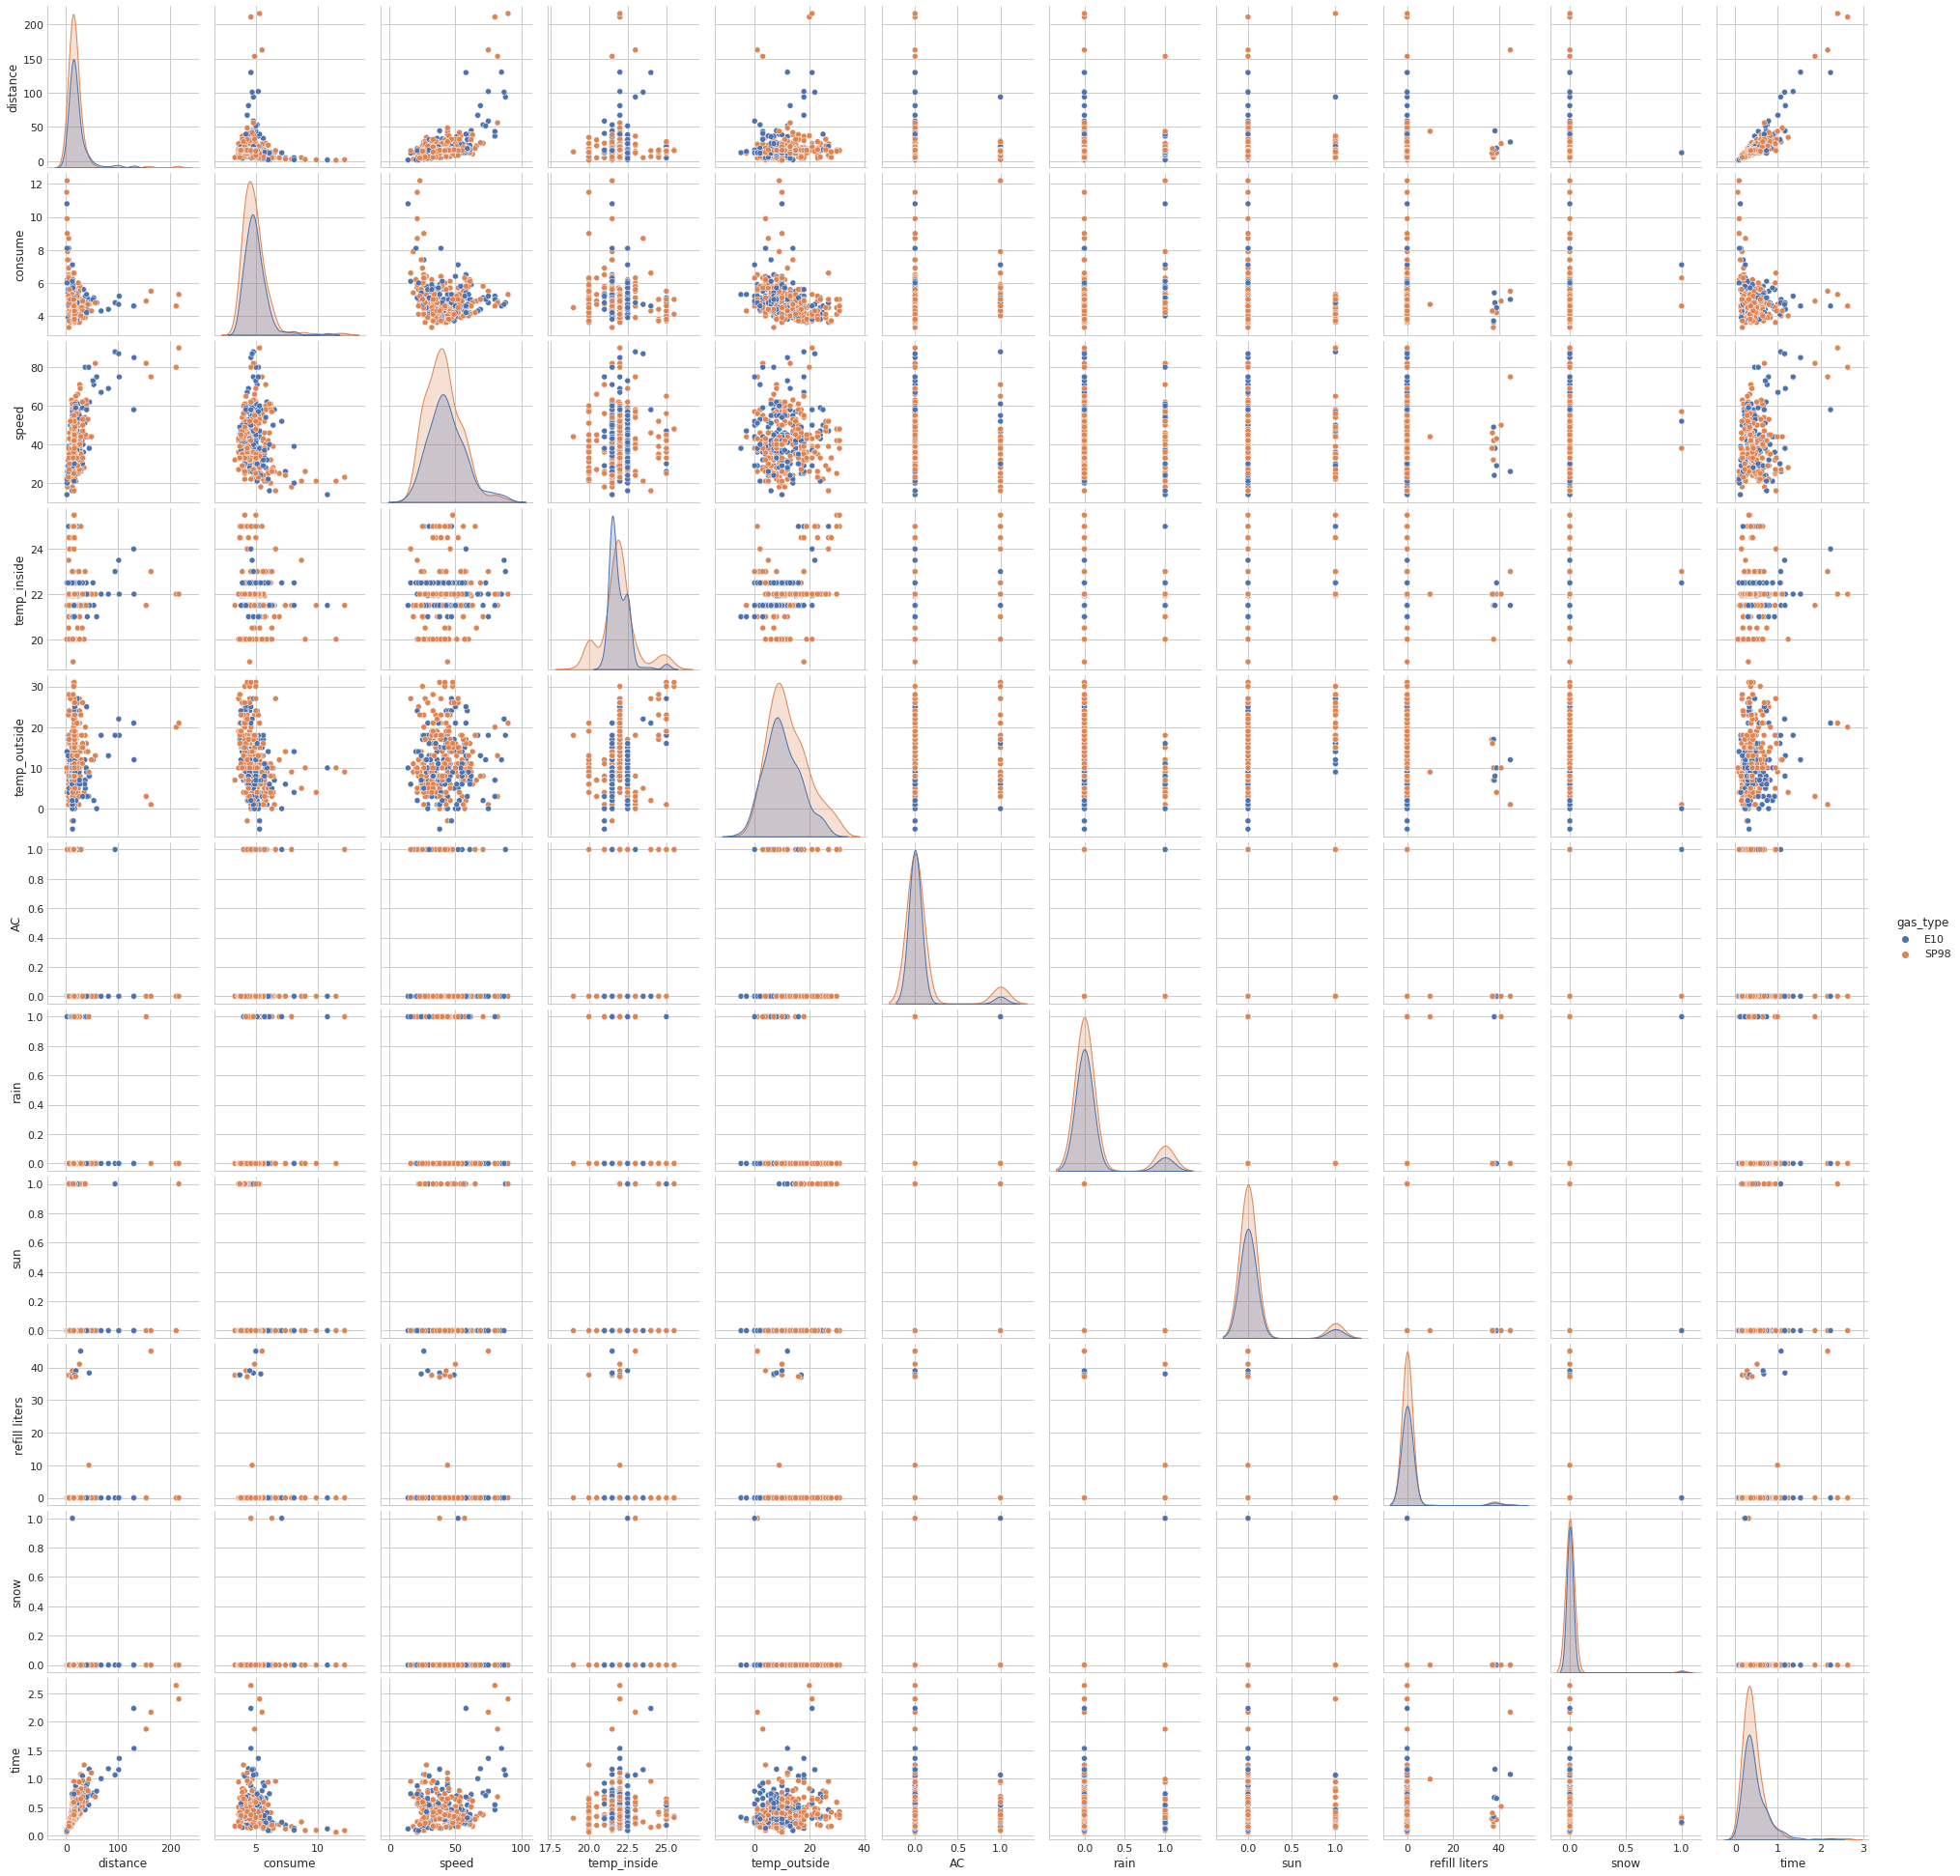

In [6]:
sns.pairplot(df, hue="gas_type")

### Saco la matriz de correlacion y la grafico para ver más relaciones

In [7]:
corr=df.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,-0.033712,0.884942
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,0.072961,-0.177825
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,0.032481,0.245061
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.097140,0.067038
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,-0.162367,0.107179
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.065984,-0.009260
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,0.271633,-0.027300
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.030600,0.058150
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.018535,0.150026
snow,-0.033712,0.072961,0.032481,0.097140,-0.162367,0.065984,0.271633,-0.030600,-0.018535,1.000000,-0.056517


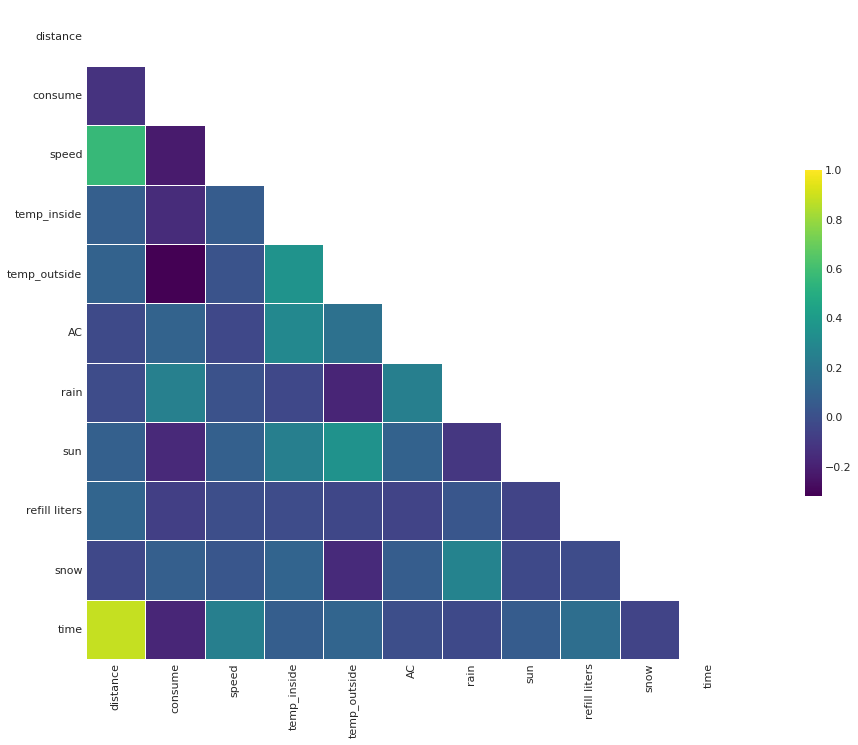

In [8]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

### Con la informacion anterior investigo posibles realciones visualmente

<AxesSubplot:xlabel='speed', ylabel='distance'>

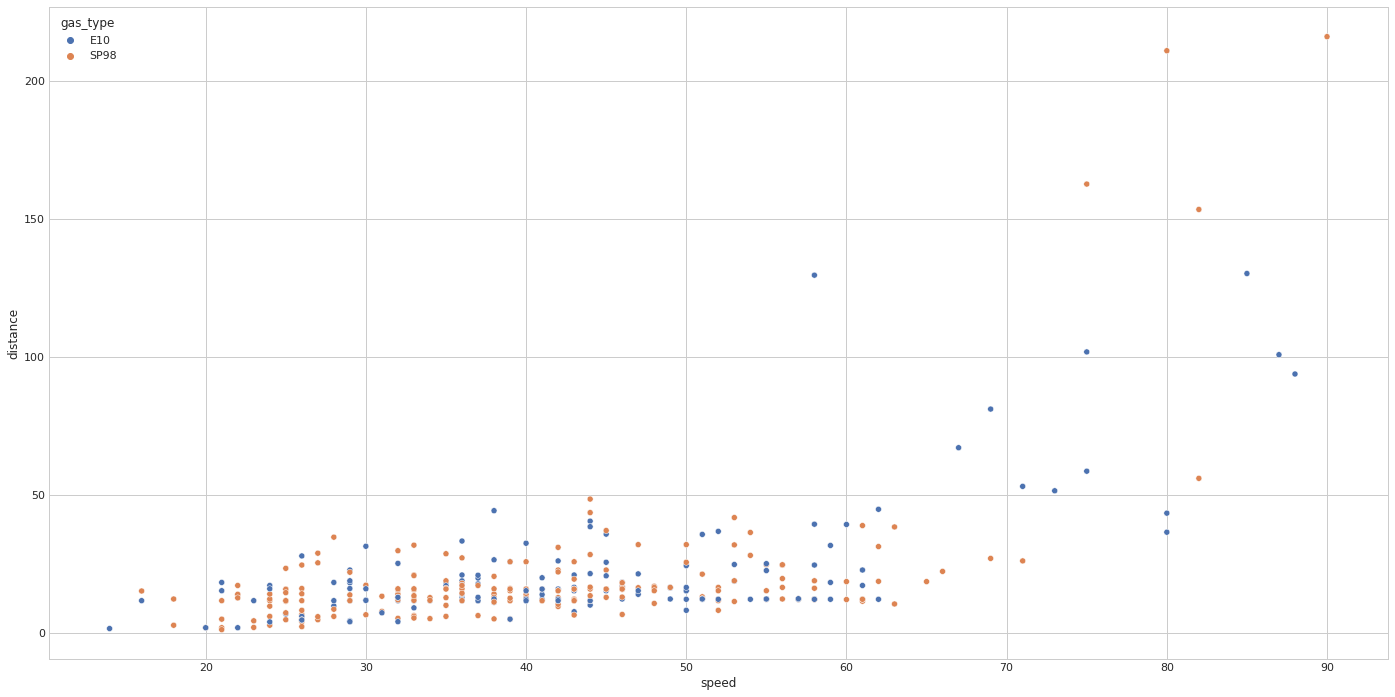

In [9]:
 sns.scatterplot(x="speed", y="distance", data=df, hue="gas_type")

<AxesSubplot:xlabel='speed', ylabel='distance'>

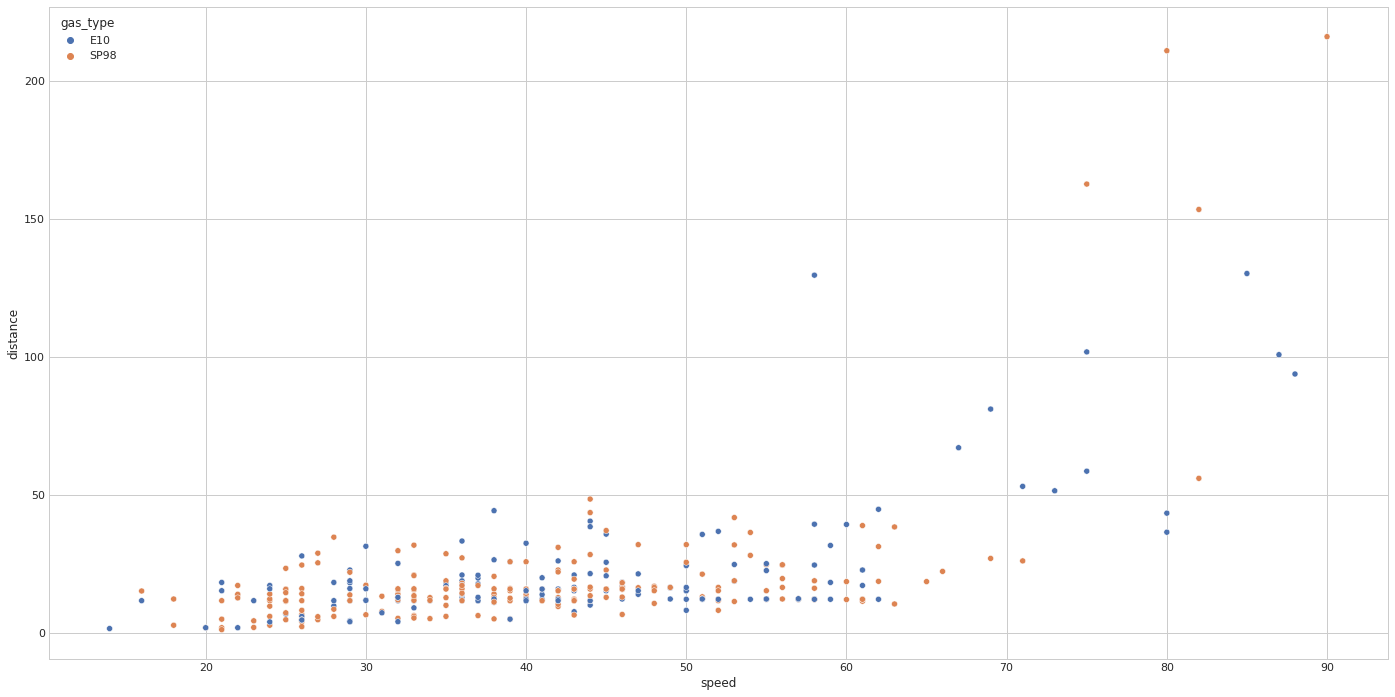

In [10]:
sns.scatterplot(x="speed", y="distance", data=df, hue="gas_type")

<AxesSubplot:xlabel='consume', ylabel='Count'>

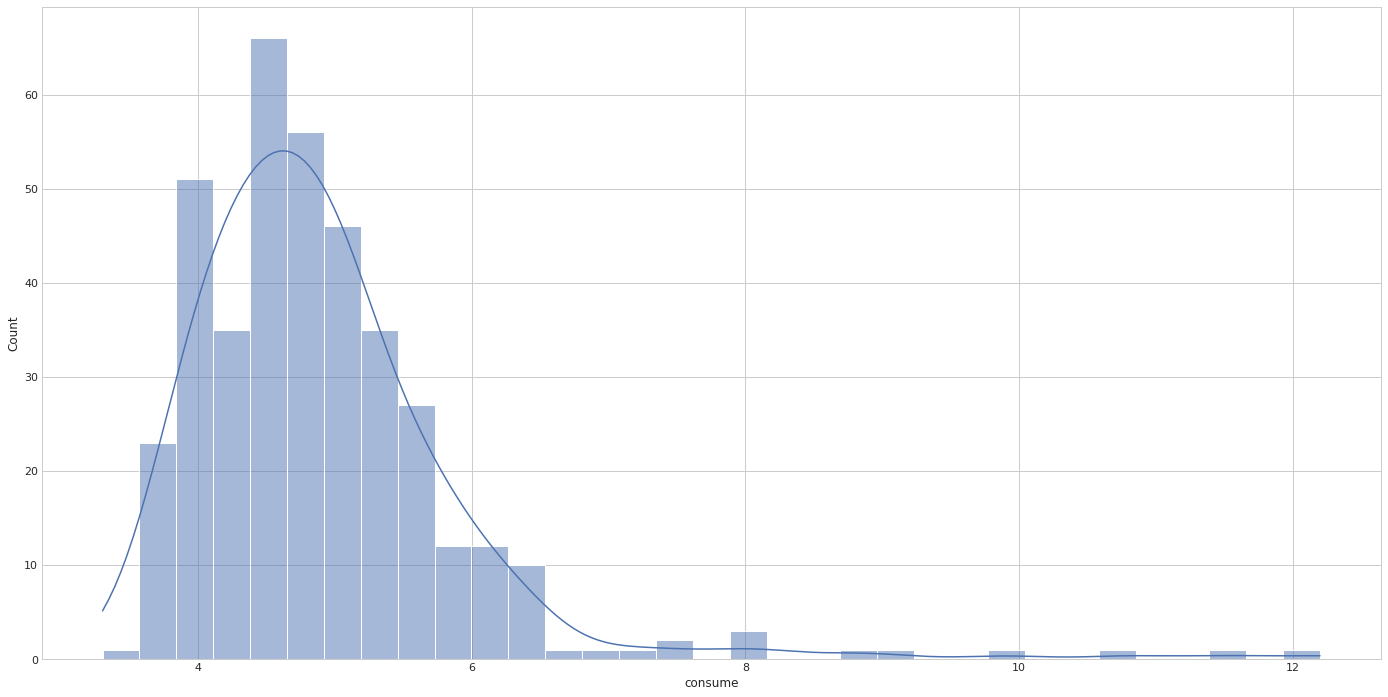

In [11]:
sns.histplot(x=df.consume, kde=True)

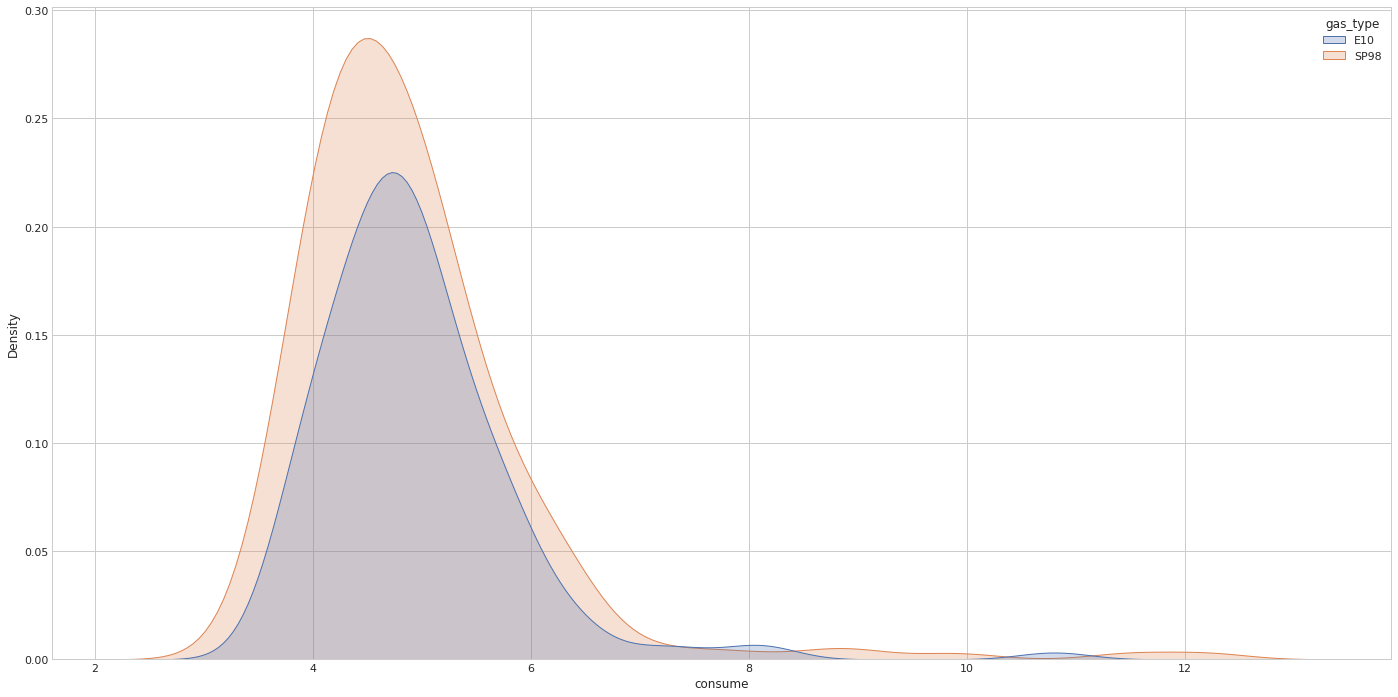

In [12]:
sns.kdeplot(x=df.consume, hue=df.gas_type, fill=True);

### A todas luces esta es la grafica más signifivativa en cuanto a consumo comparando los dos tipos de combustible, el cosumo de SP89 es sensiblemente mayor en todas las circunstancias independiente mente de los demás condicionantes.

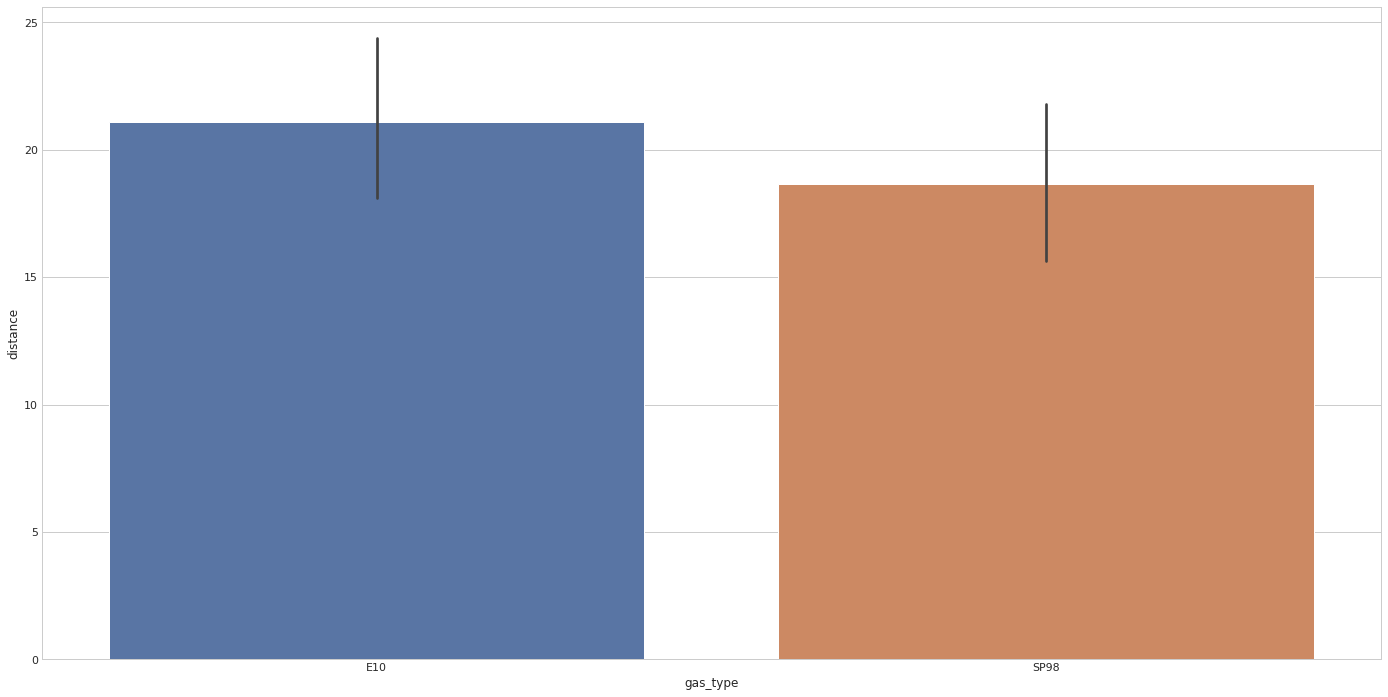

In [13]:
sns.barplot(x="gas_type", y="distance", data=df);

Esta grafica demuestra que con gaso E10 se recorre una mayor distancia


<AxesSubplot:xlabel='speed', ylabel='Count'>

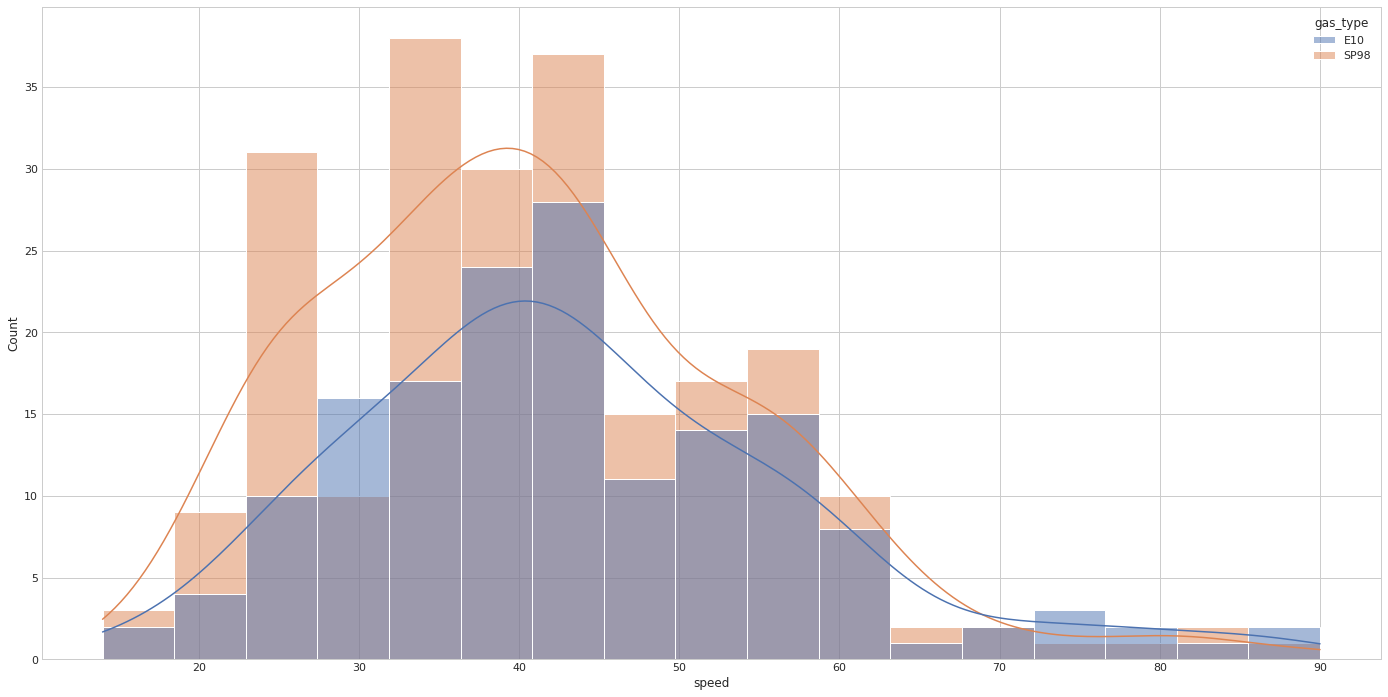

In [14]:
sns.histplot(data=df, x="speed", hue="gas_type",kde=True)

### como contrapartida los coches con SP95 parecen ser mucho más rápidos

# Estudio de la distancia recorrida 

<AxesSubplot:xlabel='distance', ylabel='Density'>

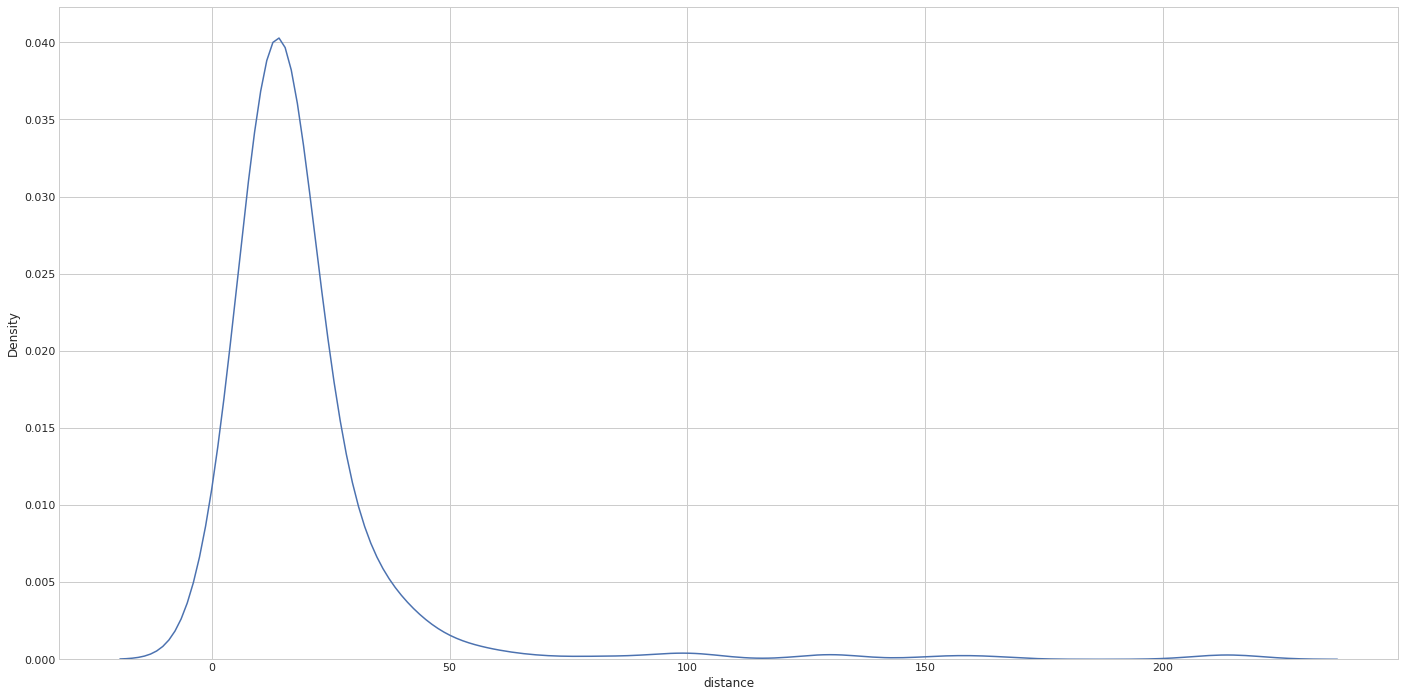

In [15]:
sns.kdeplot(x=df.distance)

## En función de la distancia tenemos una distribucion muy escorada a la derecha. Lo cual no es bueno para modelos predictivos. Estos suelen arrojar mejor resultado con una distibución normal.

In [16]:
df[df.distance>40]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
55,153.5,4.9,82,21.5,3,SP98,0,1,0,0.0,No,0,1.871951
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0,SP98,0,2.169333
156,44.9,4.7,62,21.5,8,E10,0,0,0,0.0,No,0,0.724194
162,53.2,5.1,71,21.5,2,E10,0,0,0,0.0,No,0,0.749296
164,43.5,5.0,80,21.5,3,E10,0,0,0,0.0,No,0,0.543750
171,44.4,4.8,38,21.5,8,E10,0,0,0,38.3,E10,0,1.168421
175,40.6,4.4,44,21.0,3,E10,0,0,0,0.0,No,0,0.922727
178,58.7,4.8,75,21.0,0,E10,0,0,0,0.0,No,0,0.782667
185,51.6,5.0,73,22.5,12,E10,0,0,0,0.0,No,0,0.706849
188,81.2,4.4,69,22.0,13,E10,0,0,0,0.0,No,0,1.176812


## Creo dos data frames en funcion de la distancia, para corta distancia <30 km df_cd y para larga media >50 km df_md para media distanciaca y el restos df_ld para larga distancia  

In [17]:
df_cd = df[df.distance<=30]

In [18]:
df_resto = df[df.distance>30]

In [19]:
df_md = df_resto[df_resto.distance<=50]

In [20]:
df_ld = df_resto[df_resto.distance >50]

<AxesSubplot:xlabel='distance', ylabel='Density'>

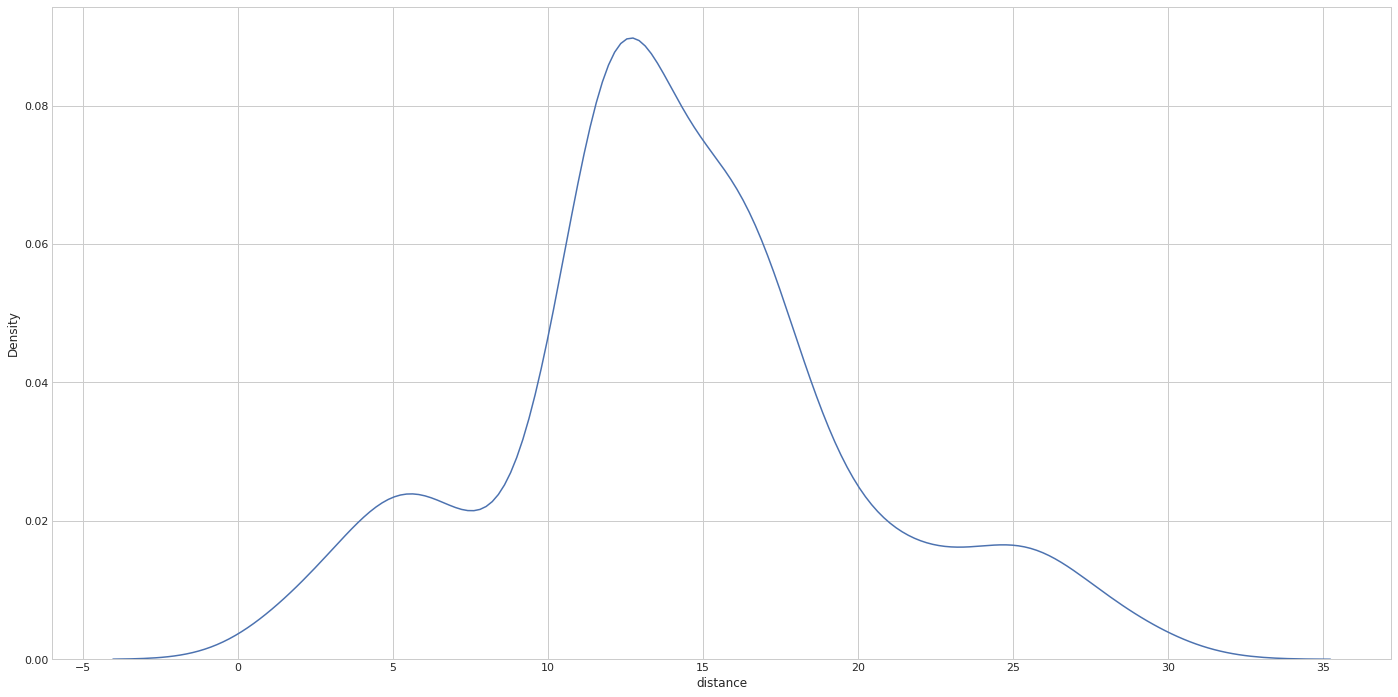

In [21]:
sns.kdeplot(x=df_cd.distance)

<AxesSubplot:xlabel='distance', ylabel='Density'>

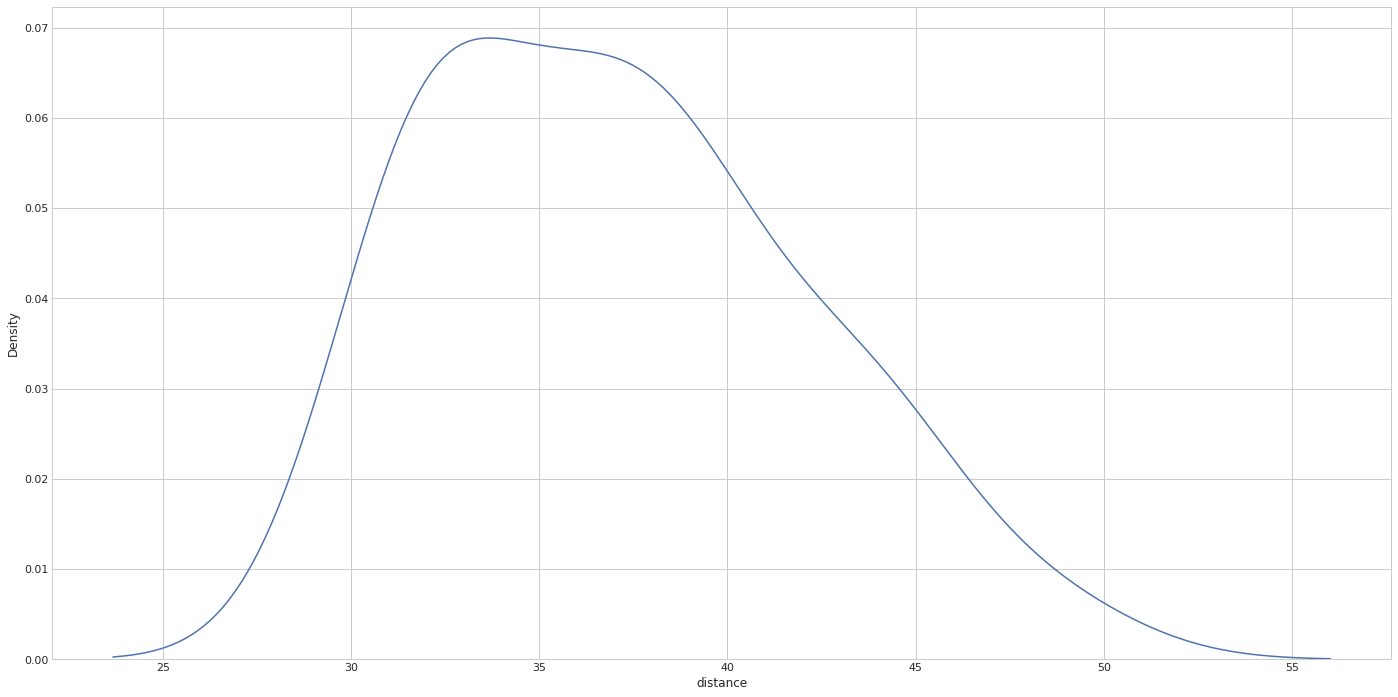

In [22]:
sns.kdeplot(x=df_md.distance)

<AxesSubplot:xlabel='distance', ylabel='Density'>

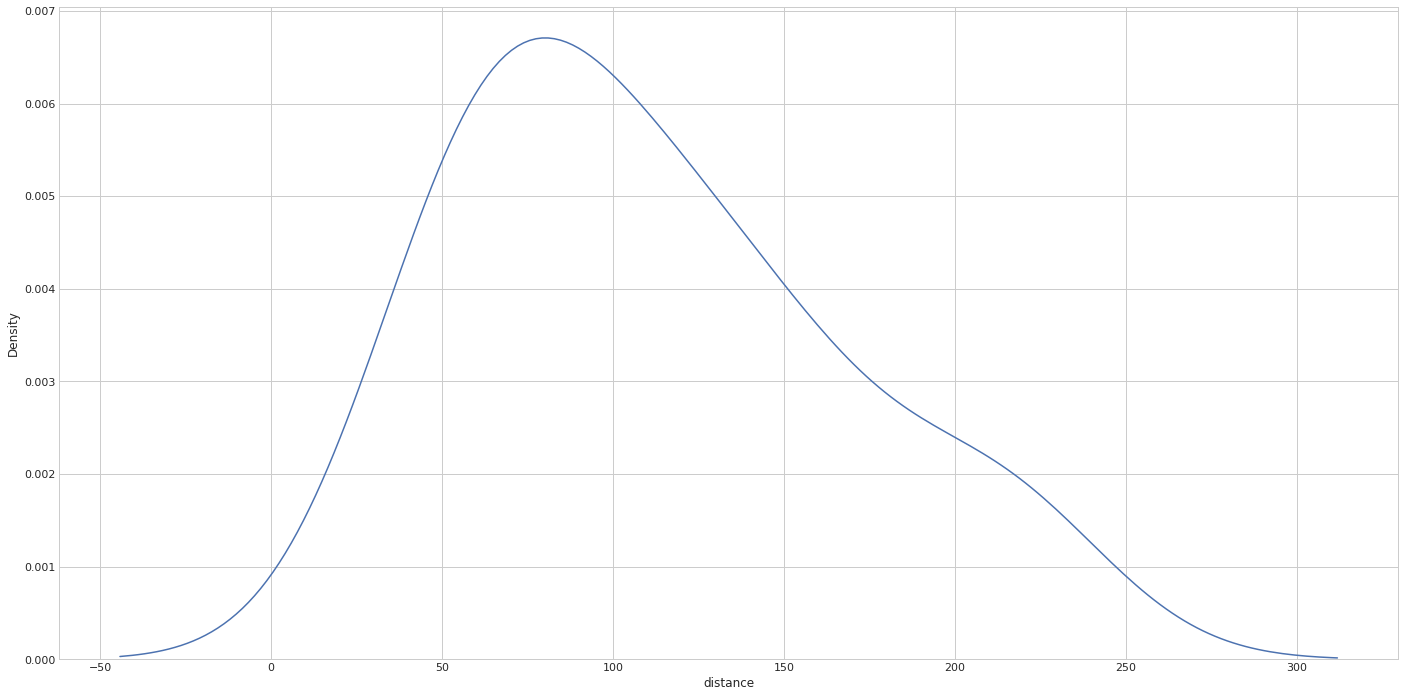

In [23]:
sns.kdeplot(x=df_ld.distance)

## Ahora tenemos tres data frames con una distribucion relativamente normal / simetrica

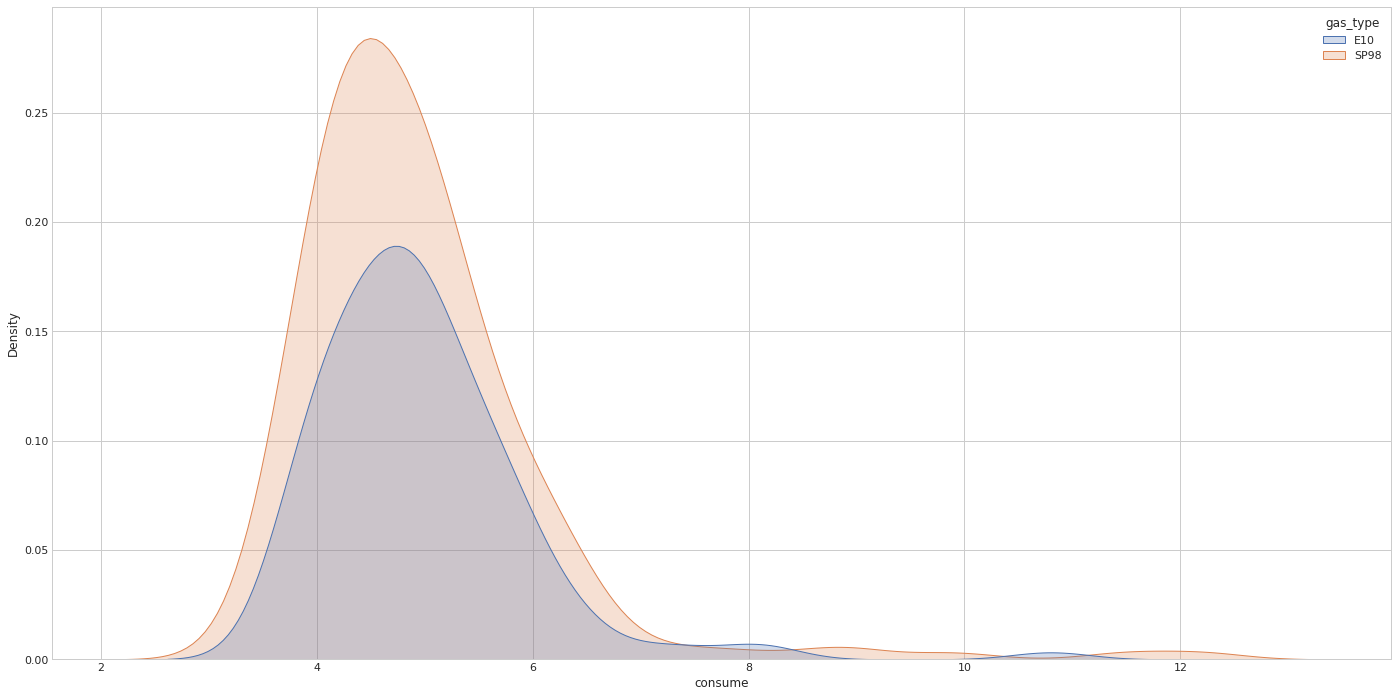

In [24]:
sns.kdeplot(x=df_cd.consume, hue=df_cd.gas_type, fill=True);

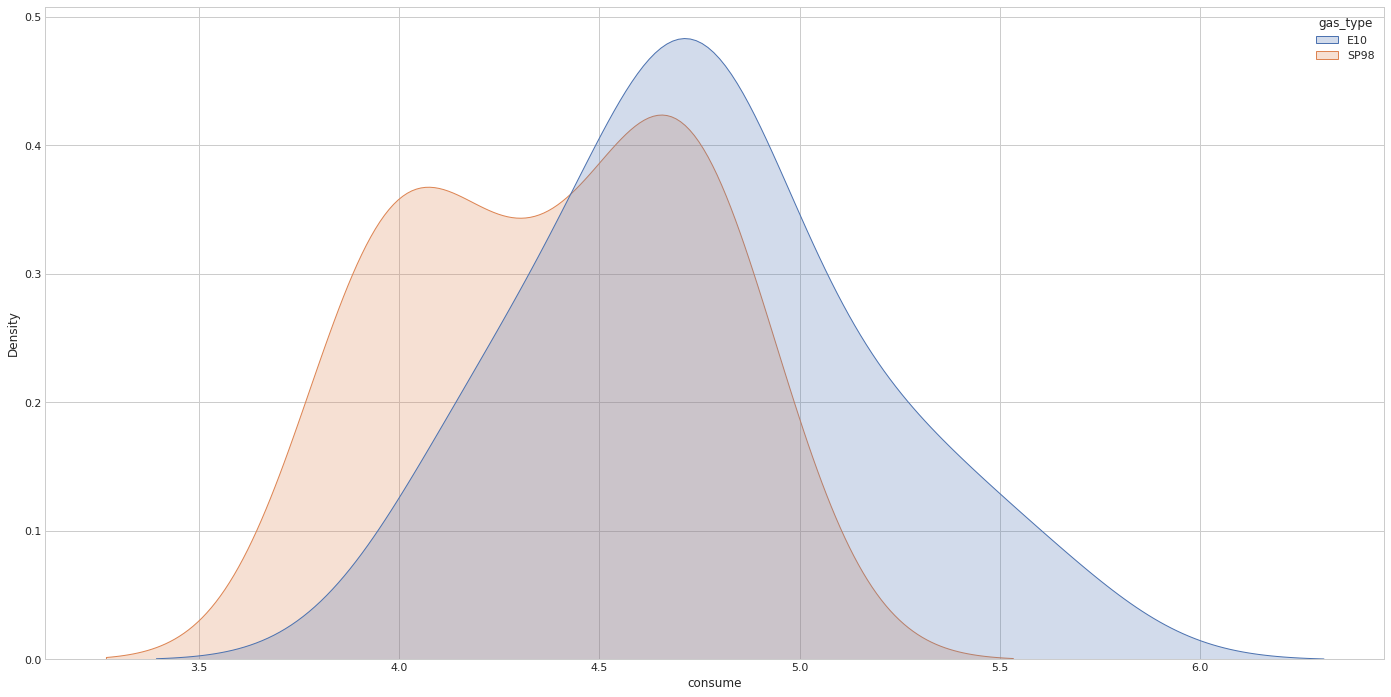

In [25]:
sns.kdeplot(x=df_md.consume, hue=df_md.gas_type, fill=True);

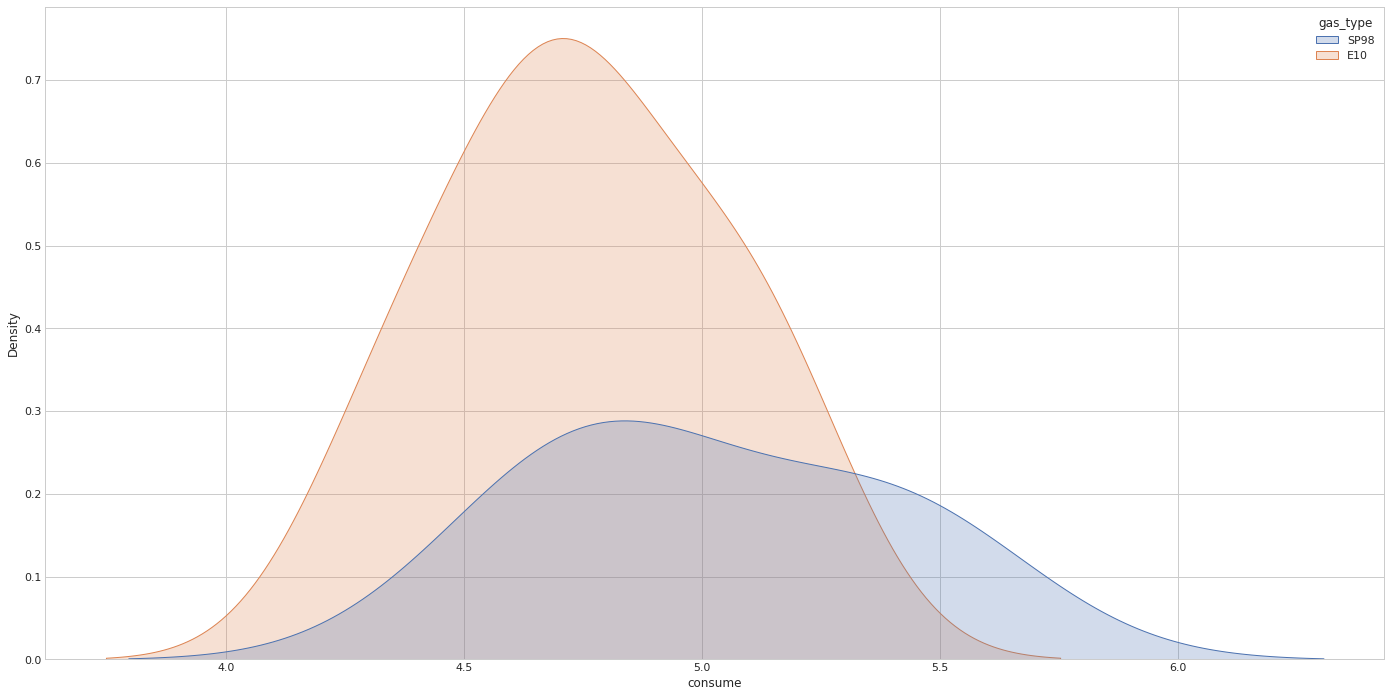

In [26]:
sns.kdeplot(x=df_ld.consume, hue=df_ld.gas_type, fill=True);

## En cuanto a consumo la distribucion sigue escorada a la izquierda, voy a examinar mejor esos casos de alto consumo en corta distancia

In [27]:
df_cd_ac = df_cd[df_cd.consume>6]
df_cd_ac

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
5,8.3,6.4,50,21.5,10,E10,0,0,0,0.0,No,0,0.166000
8,4.9,6.4,26,21.5,4,E10,0,0,0,0.0,No,0,0.188462
37,4.9,7.4,26,21.5,6,E10,0,0,0,0.0,No,0,0.188462
39,12.3,6.5,58,21.5,7,E10,0,0,0,0.0,No,0,0.212069
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.0,No,0,0.095238
53,13.1,6.1,46,21.5,6,SP98,0,1,0,0.0,No,0,0.284783
54,6.1,6.4,28,21.5,8,SP98,0,0,0,0.0,No,0,0.217857
57,12.3,6.2,61,21.5,8,SP98,0,0,0,0.0,No,0,0.201639
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.0,No,0,0.161111
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.0,No,0,0.091304


In [28]:
df_cd.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,1.076923
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0,0.400000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0,0.294737
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0,0.358333
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0,0.402174


## Examinando los tiempos de recorrido, general y por distancia

In [29]:
df.time.mean()

0.4440467766320883

In [30]:
df_cd.time.mean()

0.3725396595057828

In [31]:
df_md.time.mean()

0.779283645636246

In [32]:
df_ld.time.mean()

1.4358187159873217

## Examinando los tiempos de recorrido por distancia en recorrido con alto consumo >6

In [33]:
df_cd[df_cd.consume>6].time.mean()

0.22401863930805951

In [34]:
df_md[df_md.consume>6].time.mean()

nan

In [35]:
df_ld[df_ld.consume>6].time.mean()

nan

## Queda patente que los caso de alto consumo se producen en corta ditancia.
